# An Illustrated Guide to the Zero Inflated Poisson Regression Model

### Goals:

1. A process that determines whether or not a camping group indulged in a successful fishing activity: The ZIP model will internally use a Logistic Regression model that was explained earlier to model this binary process.
2. A second process that determines how many fish were caught by a camping group, given that there was at least one fish caught by the group: The ZIP model will use a regular Poisson model for modeling this second process.

In [19]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/3600/1*eLxe7T8crNog3X7TeohnlQ.png', width=800)

In [21]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1050/1*PYNehN4r7FMMc5bf_YI4Cw.png', width=1000)

In [22]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1050/1*ci0iQSqNzgZFrMIL9AKJZA.png', width=800)

In [23]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('/content/fish.csv', header=0)

The camping trips data set contains the following variables:
- FISH_COUNT: The number of fish that were caught. This will be our dependent variable y.
- LIVE_BAIT: A binary variable indicating whether live bait was used.
- CAMPER: Whether the fishing group used a camper van.
- PERSONS: Total number of people in the fishing group. Note that in some groups, none of them may have fished.
- CHILDREN: The number of children in the camping group.

In [25]:
print(df.head(15))

    LIVE_BAIT  CAMPER  PERSONS  CHILDREN  FISH_COUNT
0           0       0        1         0           0
1           1       1        1         0           0
2           1       0        1         0           0
3           1       1        2         1           0
4           1       0        1         0           1
5           1       1        4         2           0
6           1       0        3         1           0
7           1       0        4         3           0
8           0       1        3         2           0
9           1       1        1         0           1
10          1       0        4         1           0
11          1       1        3         2           0
12          0       0        3         0           1
13          1       0        3         0           2
14          1       1        1         0           0


In [26]:
mask = np.random.rand(len(df)) < 0.8

In [27]:
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=204
Testing data set length=46


In [28]:
df_train

,LIVE_BAIT,CAMPER,PERSONS,CHILDREN,FISH_COUNT
0,0,0,1,0,0
1,1,1,1,0,0
2,1,0,1,0,0
3,1,1,2,1,0
4,1,0,1,0,1
...,...,...,...,...,...
245,1,1,2,0,0
246,1,1,4,3,0
247,1,1,2,1,0
248,1,1,3,2,0


In [29]:
expr = 'FISH_COUNT ~ LIVE_BAIT  + CAMPER + CHILDREN + PERSONS'

In [30]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [31]:
y_train

,FISH_COUNT
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
245,0.0
246,0.0
247,0.0
248,0.0


In [32]:
X_train

,Intercept,LIVE_BAIT,CAMPER,CHILDREN,PERSONS
0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,1.0
2,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,2.0
4,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
245,1.0,1.0,1.0,0.0,2.0
246,1.0,1.0,1.0,3.0,4.0
247,1.0,1.0,1.0,1.0,2.0
248,1.0,1.0,1.0,2.0,3.0


- inflation: The ZeroInflatedPoisson model class will internally use a LogisticRegression model to estimate the parameter ϕ. Hence we set the model parameter inflation to ’logit’. We can also experiment with setting it to other Binomial link functions such as ‘probit’.
- exog_infl: We also want to ask the ZIP model to estimate ϕ as a function of the same set of regression variables as the parent model, namely: LIVE_BAIT, CAMPER, PERSONS and CHILDREN. Hence we set the parameter exog_infl to X_train. If you want to use only a subset of X_train, you can do so, or you can set exog_infl to an entirely different set of regression variables.

In [33]:
zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, inflation='logit').fit()

         Current function value: 2.786937
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [34]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:              FISH_COUNT   No. Observations:                  204
Model:             ZeroInflatedPoisson   Df Residuals:                      199
Method:                            MLE   Df Model:                            4
Date:                 Tue, 15 Jun 2021   Pseudo R-squ.:                  0.4117
Time:                         14:41:08   Log-Likelihood:                -568.54
converged:                       False   LL-Null:                       -966.47
Covariance Type:             nonrobust   LLR p-value:                6.045e-171
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     1.5062      1.007      1.496      0.135      -0.467       3.479
inflate_LIVE_BAIT    -0.5835      0.829     -0.704      0.482      -2.209       1.042
inflate_CAMPER  

In [35]:
zip_predictions = zip_training_results.predict(X_test,exog_infl=X_test)
zip_predictions[0:5]

7     0.004295
11    0.121861
12    0.956634
22    0.491629
23    4.503735
dtype: float64

In [36]:
predicted_counts=np.round(zip_predictions)
predicted_counts[0:5]

7     0.0
11    0.0
12    1.0
22    0.0
23    5.0
dtype: float64

In [37]:
actual_counts = y_test['FISH_COUNT']
print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

ZIP RMSE=45.044422518220834


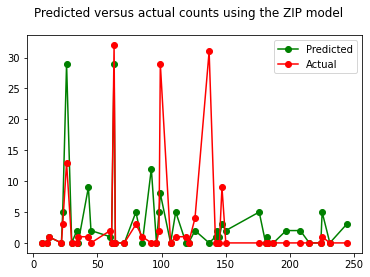

In [38]:
fig = plt.figure()
fig.suptitle('Predicted versus actual counts using the ZIP model')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual')
plt.legend(handles=[predicted, actual])
plt.show()

https://towardsdatascience.com/an-illustrated-guide-to-the-zero-inflated-poisson-model-b22833343057